# Fundamentals of Artificial Intelligence Programme (2024/25 Q1)
## Data Work 2

### Introduction
<!-- A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will evaluate the impact of incorrect labels on a number of different classifiers. -->
A very important aspect of supervised and semi-supervised machine learning is the quality of the labels produced by human labelers. Unfortunately, humans are not perfect and in some cases may even maliciously label things incorrectly. In this assignment, you will explore a dataset that has missing data (null/NaN values) and fields in formats that are uninterpretable by machine learning models. By the end, you will have spent time learning how to handle messy data and how to apply simple machine learning strategies to such data, as well as see how poorly labelled data impacts the performance of such strategies.

We have provided a number of code snippets you can use during this assignment. Feel free to modify them or replace them.


### Dataset
The dataset you will be using is the [Adult Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). Remember to download this dataset from [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/500234/viewContent/2994354/View). This dataset was created by Ronny Kohavi and Barry Becker and was used to predict whether a person's income is more/less than 50k USD based on census data.

### Data preprocessing
Start by loading and preprocessing the data. Remove NaN values, convert strings to categorical variables and encode the target variable (the string <=50K, >50K in column index 14). You can read more on categorical data in Pandas [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html), and more on encoding values [here](https://pbpython.com/categorical-encoding.html).

In [ ]:
import pandas as pd
import numpy as np

#great!

In [ ]:
# This can be used to load the dataset
data = pd.read_csv("adult_all.csv")

#Remove NaN values
data = data.dropna()
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,target
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# check the values counts of all the object type columns
data.select_dtypes(include=['object']).columns

# select the columns that are non-object type and name it as data_num
data_num = data.select_dtypes(exclude=['object'])

# see the unique values in the object type columns and the number of unique values
for col in data.select_dtypes(include=['object']).columns:
    print(col)
    # print(data[col].unique())
    print(data[col].nunique())

feature1
7
feature3
16
feature5
7
feature6
14
feature7
6
feature8
5
feature9
2
feature13
41
target
2


In [ ]:
# Code
# convert the object type columns to categorical type and encode them and give a dict of the encoding
data_cat = data.select_dtypes(include=['object'])
data_cat = data_cat.astype('category')
data_cat = data_cat.apply(lambda x: x.cat.codes)
data_cat.head()

# combine the numerical and encoded categorical columns
data = pd.concat([data_num, data_cat], axis=1)
data.head()


,feature2,feature4,feature10,feature11,feature12,feature1,feature3,feature5,feature6,feature7,feature8,feature9,feature13,target
0,77516,13,2174,0,40,5,9,4,0,1,4,1,38,0
1,83311,13,0,0,13,4,9,2,3,0,4,1,38,0
2,215646,9,0,0,40,2,11,0,5,1,4,1,38,0
3,234721,7,0,0,40,2,1,2,5,0,2,1,38,0
4,338409,13,0,0,40,2,9,2,9,5,2,0,4,0


In [ ]:
# convert all the columns to int64
data = data.astype('int64')
# Check shape at end
print(data.shape)
print(data.info())

(45222, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   feature2   45222 non-null  int64
 1   feature4   45222 non-null  int64
 2   feature10  45222 non-null  int64
 3   feature11  45222 non-null  int64
 4   feature12  45222 non-null  int64
 5   feature1   45222 non-null  int64
 6   feature3   45222 non-null  int64
 7   feature5   45222 non-null  int64
 8   feature6   45222 non-null  int64
 9   feature7   45222 non-null  int64
 10  feature8   45222 non-null  int64
 11  feature9   45222 non-null  int64
 12  feature13  45222 non-null  int64
 13  target     45222 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB
None


### Data classification
Choose a [classifier](https://scikit-learn.org/stable/supervised_learning.html) and evaluate their performance in predicting the target variable.

#### Preprocessing
Think about how you are going to encode the categorical variables, whether you want to use all of the features or not. Justify your choices

A good method to apply preprocessing steps is using a Pipeline. Read more about this [here](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) and [here](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf).

#### Data visualization
Calculate the correlation between different features, including the target variable. Visualize the correlations in a heatmap. A good example of how to do this can be found [here](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec).

Select a features you think will be an important predictor of the target variable and one which is not important. Explain your answers.

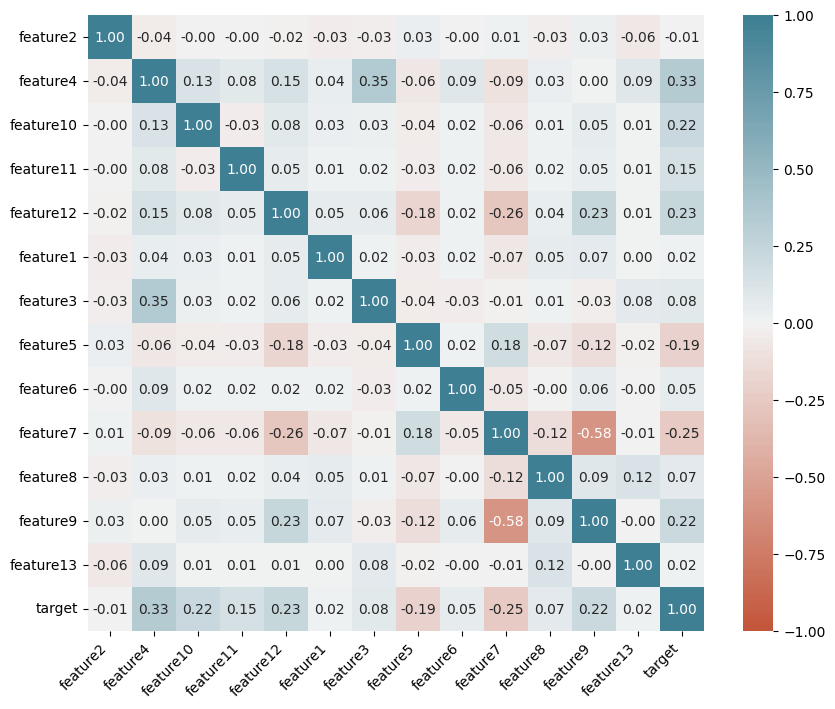

In [ ]:
# Heatmap code
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True, # Add numbers on the heatmap
    fmt=".2f", # Format the numbers to 2 decimal places
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [ ]:
# prompt: calculate the importance of each column

#Chosen classifier: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
# X = data.drop(13, axis=1)  # column 13 is the target and using the rest as features
# y = data[13]               # column 13 is the target column
X = data.iloc[:, :-1]
y = data['target']
rf.fit(X, y)


#Evaluating the chosen Random Forest Classifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting training & test data
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)




Accuracy: 0.8440022111663903
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6745
           1       0.72      0.63      0.67      2300

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.79      9045
weighted avg       0.84      0.84      0.84      9045

Confusion Matrix:
 [[6175  570]
 [ 841 1459]]
      feature  importance
0    feature2    0.297076
2   feature10    0.115733
9    feature7    0.102220
4   feature12    0.091862
7    feature5    0.088180
1    feature4    0.083590
8    feature6    0.064671
5    feature1    0.039543
3   feature11    0.039067
6    feature3    0.033396
12  feature13    0.018018
10   feature8    0.014805
11   feature9    0.011839


In [ ]:
# decide which columns to be deleted
# drop 12,7, and 8, which is feature 13, feature 9, and feature 8

X_dropped = X.drop(['feature13', 'feature8', 'feature9'], axis=1)

# Display the first few rows to verify the drop
print(X_dropped.head())



   feature2  feature4  feature10  feature11  feature12  feature1  feature3  \
0     77516        13       2174          0         40         5         9   
1     83311        13          0          0         13         4         9   
2    215646         9          0          0         40         2        11   
3    234721         7          0          0         40         2         1   
4    338409        13          0          0         40         2         9   

   feature5  feature6  feature7  
0         4         0         1  
1         2         3         0  
2         0         5         1  
3         2         5         0  
4         2         9         5  


In [ ]:
# Hereby, new data after cleaning is dta and is X_dropped+y
dta = pd.concat([X_dropped, y], axis=1)
dta.head()

,feature2,feature4,feature10,feature11,feature12,feature1,feature3,feature5,feature6,feature7,target
0,77516,13,2174,0,40,5,9,4,0,1,0
1,83311,13,0,0,13,4,9,2,3,0,0
2,215646,9,0,0,40,2,11,0,5,1,0
3,234721,7,0,0,40,2,1,2,5,0,0
4,338409,13,0,0,40,2,9,2,9,5,0


#### Evaluation
Use a metric from the lecture videos to evaluate the performance of the model.

**here some hints:** If you use logistic regression or its variants lasso, ridge, you need to scale X_dropped and check the outliers first. If there are no outliers, it is recommended to use Standardization (or it is just a weekly assigment, and it doesn’t matter if there are outliers) and then train. If you use XGboost, random forest or reinforcement learning, there is no need to scale the data.  ——YM

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define your preprocessing steps here
# steps = []
categorical_columns = X_dropped.columns[5:]
steps = [
    ('cat', OneHotEncoder(), categorical_columns)
]


# Combine steps into a ColumnTransformer
ct = ColumnTransformer(steps)

# show the correlation between different features including target variable
def visualize(data, ct):
    pass

# Apply your model to feature array X and labels y
def apply_model(model, X_train, y_train):
    # Wrap the ColumnTransformer and model into a Pipeline
    pipeline = Pipeline(steps=[('preprocessor', ct), ('model', model)])

    # Fit the pipeline with the training data
    pipeline.fit(X_train, y_train)

    # Return the fitted pipeline
    return pipeline

# Function to evaluate the model
def evaluate_model(X_test, y_test, pipeline):
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print classification report
    class_report = classification_report(y_test, y_pred)

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Output results
    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)

    return accuracy, class_report, conf_matrix


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=42)


In [ ]:
# Performing the evaluation

# Assuming that X_dropped and y are already defined in the notebook
# X_dropped: preprocessed feature data
# y: target variable

# Define the Random Forest classifier (or any other classifier)
rf = RandomForestClassifier(
    n_estimators=100,             # Number of trees in the forest
    max_depth=10,                 # Maximum depth of each tree to control overfitting
    min_samples_split=10,         # Minimum number of samples required to split a node
    min_samples_leaf=5,           # Minimum number of samples required at each leaf node
    max_leaf_nodes=50,            # Limit the maximum number of leaf nodes in each tree
    random_state=42               # Set random seed for reproducibility
)

# Call the apply_model function to train the model and get the pipeline and test data
pipeline = apply_model(rf, X_train, y_train)

# Call the evaluate_model function to evaluate the trained model on the test data
accuracy, class_report, conf_matrix = evaluate_model(X_test, y_test, pipeline)

Accuracy: 0.8221116639027087
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6745
           1       0.72      0.49      0.58      2300

    accuracy                           0.82      9045
   macro avg       0.78      0.71      0.73      9045
weighted avg       0.81      0.82      0.81      9045

Confusion Matrix:
 [[6317  428]
 [1181 1119]]


In [ ]:
np.mean(X_dropped)/len(X_dropped)

0.42235704263880847

### Label perturbation
To evaluate the impact of faulty labels in a dataset, we will introduce some errors in the labels of our data.


#### Preparation
Start by creating a method which alters a dataset by selecting a percentage of rows randomly and swaps labels from a 0->1 and 1->0.


In [49]:
import random

"""Given a label vector, create a new copy where a random fraction of the labels have been flipped."""
def perturbate(y: np.ndarray, fraction: float) -> np.ndarray:
    copy = y.copy()  # Create a copy of the labels array
    n = len(y)  # Total number of labels
    num_flips = int(fraction * n)  # Calculate the number of labels to flip based on the given fraction

    # Randomly select indices of labels to flip
    indices_to_flip = random.sample(range(n), num_flips)

    # Flip the selected labels
    for index in indices_to_flip:
        copy[index] = 1 - copy[index]  # Flips 0 to 1 and 1 to 0

    return copy

#### Analysis
Create a number of new datasets with perturbed labels, for fractions ranging from `0` to `0.5` in increments of `0.1`.

Perform the same experiment you did before, which compared the performances of different models except with the new datasets. Repeat your experiment at least once for each model and perturbation level and calculate the mean and variance of the scores.

In [53]:
features = dta.drop(columns=['target'])  # Drop the target column to isolate features
labels = dta['target']  # Isolate the target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define fractions of noise to introduce
fractions = np.arange(0, 0.6, 0.1)

# Number of trials to perform for each fraction level
n_trials = 10

# Store results for each fraction
results = {fraction: [] for fraction in fractions}

for fraction in fractions:
    for _ in range(n_trials):
        # Perturbate labels in the training dataset
        y_train_noisy = perturbate(y_train.to_numpy(), fraction)

        # Initialize the RandomForest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)

        # Train the model with noisy training data
        model.fit(X_train, y_train_noisy)

        # Evaluate the model on the clean testing dataset
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)

        # Save the accuracy for this fraction
        results[fraction].append(accuracy)

# Calculate the mean and variance of accuracies for each fraction
mean_scores = {fraction: np.mean(scores) for fraction, scores in results.items()}
variance_scores = {fraction: np.var(scores) for fraction, scores in results.items()}

# Output the mean and variance scores
for fraction in fractions:
    print(f"Fraction of noise: {fraction:.1f}, Mean accuracy: {mean_scores[fraction]:.2f}, Variance: {variance_scores[fraction]:.4f}")

Fraction of noise: 0.0, Mean accuracy: 0.84, Variance: 0.0000
Fraction of noise: 0.1, Mean accuracy: 0.82, Variance: 0.0000
Fraction of noise: 0.2, Mean accuracy: 0.78, Variance: 0.0000
Fraction of noise: 0.3, Mean accuracy: 0.72, Variance: 0.0000
Fraction of noise: 0.4, Mean accuracy: 0.63, Variance: 0.0000
Fraction of noise: 0.5, Mean accuracy: 0.50, Variance: 0.0000


Authors: Youri Arkesteijn, Tim van der Horst and Kevin Chong.

### Final Thoughts

You may have noticed in your exploration that there are many different classification models. While it's not required we highly recommend repeating the exercises above with different classifiers and exploring the sklearn documentation to familiarize yourself with the many tools available.